In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from numpy.linalg import inv
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# from functools import reduce
# from itertools import accumulate

# Sleep test HI plot per session

## Ingest a combined (all sleep sessions) csv file

- Load into a df
- Split into multiple df(s), one df per session.workout
- Plot sessions (plot label: user_name/workout_id, x-time, y-delta)

In [2]:
df = pd.read_csv("data/hs_tests/deltas/Nate_deltas.csv",
                 float_precision='high',
                 names=['deltaw', 'org_id', 'team_id', 'user_id', 'bv1', 'bv2', 'bv3', 'bv4', 'workout_id', 'ts'],
                 dtype={'user_id': str, 'workout_id': str})
df.dtypes

deltaw        float64
org_id          int64
team_id         int64
user_id        object
bv1           float64
bv2           float64
bv3           float64
bv4           float64
workout_id     object
ts             object
dtype: object

In [12]:
# Retain only non NAN deltas
df = df[np.isfinite(df['deltaw'])]
df.head(1000)

deltaw  org_id  team_id user_id       bv1       bv2       bv3  \
1    0.252524       1        1      98  0.021897  0.176724  0.007621   
2    0.136835       1        1      98  0.021897  0.176724  0.007621   
3    0.909383       1        1      98  0.021897  0.176724  0.007621   
4    0.274942       1        1      98  0.021897  0.176724  0.007621   
5    0.997183       1        1      98  0.021897  0.176724  0.007621   
..        ...     ...      ...     ...       ...       ...       ...   
146  0.728453       1        1      98  0.021897  0.176724  0.007621   
147  0.616243       1        1      98  0.021897  0.176724  0.007621   
148  0.481667       1        1      98  0.021897  0.176724  0.007621   
149  1.148014       1        1      98  0.021897  0.176724  0.007621   
150  1.026803       1        1      98  0.021897  0.176724  0.007621   

          bv4 workout_id                  ts user_session  
1    0.773207        560 2019-09-17 23:01:01       98:560  
2    0.773207        560 2019-09-17 23:02:00       98:560  
3    0.773207        560 2019-09-17 23:03:04       98:560  
4    0.773207        560 2019-09-17 23:04:01       98:560  
5    0.773207        560 2019-09-17 23:05:00       98:560  
..        ...        ...                 ...          ...  
146  0.773207        560 2019-09-18 01:35:08       98:560  
147  0.773207        560 2019-09-18 01:37:50       98:560  
148  0.773207        560 2019-09-18 01:38:05       98:560  
149  0.773207        560 2019-09-18 01:39:04       98:560  
150  0.773207        560 2019-09-18 01:40:50       98:560  

[149 rows x 11 columns]

In [4]:
df.head()

deltaw  org_id  team_id user_id       bv1       bv2       bv3       bv4  \
1  0.002525       1        1      98  0.021897  0.176724  0.007621  0.773207   
2  0.001368       1        1      98  0.021897  0.176724  0.007621  0.773207   
3  0.009094       1        1      98  0.021897  0.176724  0.007621  0.773207   
4  0.002749       1        1      98  0.021897  0.176724  0.007621  0.773207   
5  0.009972       1        1      98  0.021897  0.176724  0.007621  0.773207   

  workout_id                   ts  
1        560  2019-09-17 23:01:01  
2        560  2019-09-17 23:02:00  
3        560  2019-09-17 23:03:04  
4        560  2019-09-17 23:04:01  
5        560  2019-09-17 23:05:00

In [5]:
# df = df.astype({'workout_id': 'str'})
# df.dtypes

In [6]:
# convert 'date' to pandas date
df['ts'] = pd.to_datetime(df['ts'])
df.info()
# df.dtypes
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 150
Data columns (total 10 columns):
deltaw        149 non-null float64
org_id        149 non-null int64
team_id       149 non-null int64
user_id       149 non-null object
bv1           149 non-null float64
bv2           149 non-null float64
bv3           149 non-null float64
bv4           149 non-null float64
workout_id    149 non-null object
ts            149 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 12.8+ KB


In [7]:
df['user_session'] = df[['user_id', 'workout_id']].apply(lambda x: ':'.join(x), axis=1)
df.head()

deltaw  org_id  team_id user_id       bv1       bv2       bv3       bv4  \
1  0.002525       1        1      98  0.021897  0.176724  0.007621  0.773207   
2  0.001368       1        1      98  0.021897  0.176724  0.007621  0.773207   
3  0.009094       1        1      98  0.021897  0.176724  0.007621  0.773207   
4  0.002749       1        1      98  0.021897  0.176724  0.007621  0.773207   
5  0.009972       1        1      98  0.021897  0.176724  0.007621  0.773207   

  workout_id                  ts user_session  
1        560 2019-09-17 23:01:01       98:560  
2        560 2019-09-17 23:02:00       98:560  
3        560 2019-09-17 23:03:04       98:560  
4        560 2019-09-17 23:04:01       98:560  
5        560 2019-09-17 23:05:00       98:560

In [8]:
# Make deltaw into %
df.loc[:,'deltaw'] *= 100

In [9]:
## Drop user_name and ts
# df_new  = df.drop(['user_name','ts'], axis=1)
# df_new.head()

## Let's generate the plot



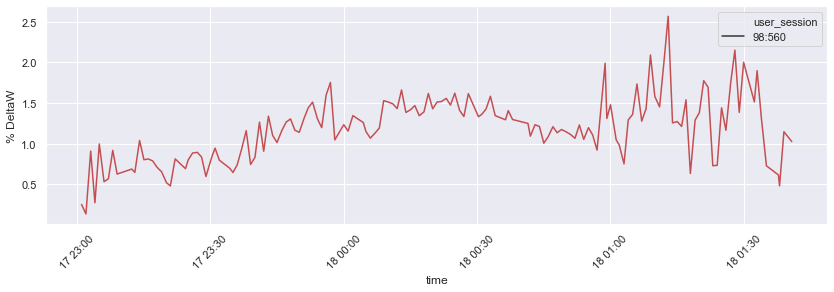

In [10]:
sns.set(color_codes=True)
sns.set(style="darkgrid")

plt.figure("user_session", figsize=(14,4))

# Smooth out
# filtered = lowess(df_new.delta, df_new.date, frac=0.2)
# df_new["smoothdelta"] = filtered[:,1]

# df_new  = df_new.drop(['delta'], axis=1)

# c = sns.regplot(x='date',y='delta', data=df_new, fit_reg=True) 

c = sns.lineplot(x='ts', y='deltaw', style="user_session", data=df, color="r")

c.set(xlabel='time', ylabel='% DeltaW')
    
for item in c.get_xticklabels():
    item.set_rotation(45)   
    
# g = sns.FacetGrid(data=df_new, col="date", col_wrap=1)
# g.map_dataframe(sns.tsplot, time="date", value="filteredvalue", color="deep")
# g.add_legend(title="Session deltaW smoothed")
# g.set_xlabels("Datetime")
# g.set_titles("{col_name}")
# plt.show()


In [11]:
# for key, value in df_dict.items() :
#     print (key)
# d_mavg = df_dict['mshirman:489']['deltaw'].rolling(window=2, center=False, win_type=None).mean()
# sns.lineplot(x="date", y="deltaw", data=d_mavg)

# sns.lineplot(x="date", y="deltaw", style="user_session", data=df_dict[df_name])
# sns.lineplot(x="date", y="deltaw", data=df_dict['Jake:479'])



# df_dict['mshirman:489']